In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


Results of Dickey-Fuller Test:
Test Statistic                 -1.132038
p-value                         0.702128
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.158402e+00
p-value                        2.572287e-15
#Lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -5.459820
p-value                         0.000003
#Lags Used                     11.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.58

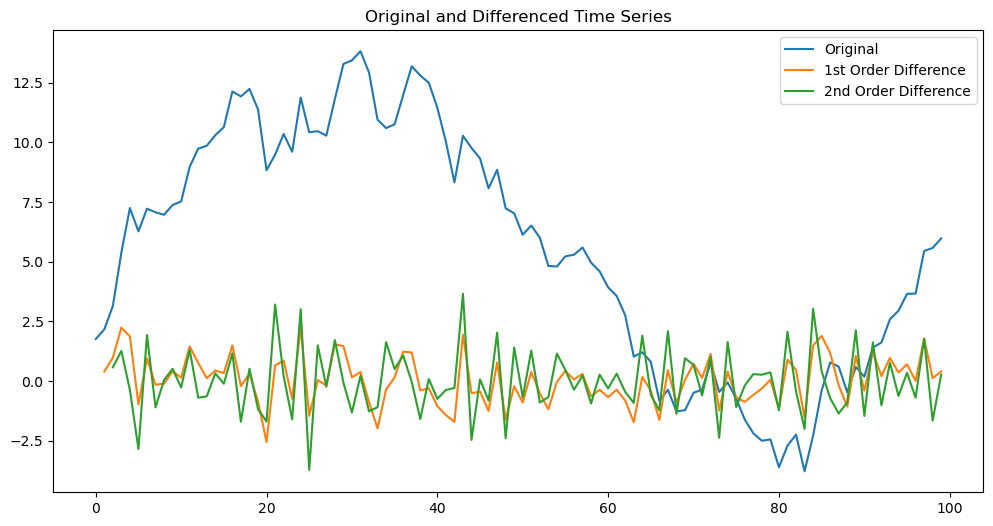

In [37]:
# 检查差分后稳定性，确定d

# 创建一个函数来检查数据的平稳性
def test_stationarity(timeseries):
    # 执行Dickey-Fuller测试
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# 以下为生成的示例序列
# 生成不平稳的时间序列
np.random.seed(0)
n = 100
x = np.cumsum(np.random.randn(n))
# 把它转换成Pandas的DataFrame格式
df = pd.DataFrame(x, columns=['value'])

# 检查原始数据的平稳性
test_stationarity(df['value'])

# 进行一阶差分
df['first_difference'] = df['value'] - df['value'].shift(1)

# 检查一阶差分后的数据的平稳性
test_stationarity(df['first_difference'].dropna())

# 进行二阶差分
df['second_difference'] = df['first_difference'] - df['first_difference'].shift(1)

# 检查二阶差分后的数据的平稳性
test_stationarity(df['second_difference'].dropna())

# 可视化原始数据和差分后的数据
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original')
plt.plot(df['first_difference'], label='1st Order Difference')
plt.plot(df['second_difference'], label='2nd Order Difference')
plt.legend(loc='best')
plt.title('Original and Differenced Time Series')
plt.show()

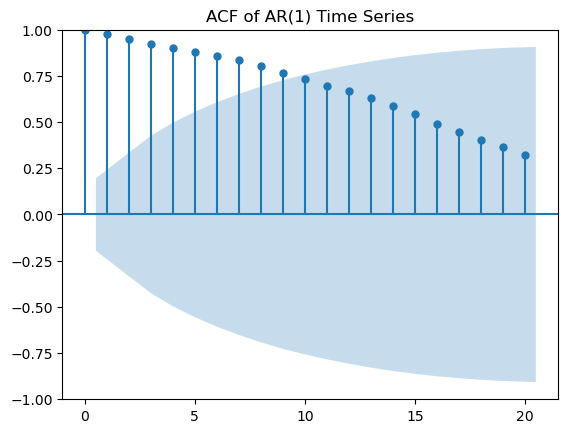

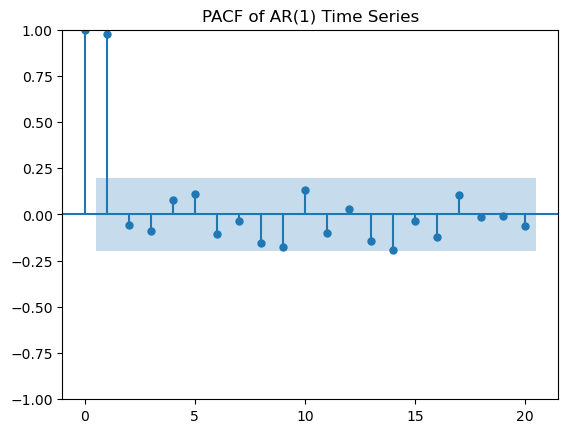

In [38]:
# 利用raf与praf确定p和q

# 绘制ACF图像
plot_acf(df['value'], lags=20)
plt.title('ACF of AR(1) Time Series')
plt.show()

# 绘制PACF图像
plot_pacf(df['value'], lags=20)
plt.title('PACF of AR(1) Time Series')
plt.show()

In [39]:
# 拟合模型并检验aic与bic

# 设置超参数
p = 1
d = 1
q = 1

# 创建ARIMA模型对象
arima_model = sm.tsa.ARIMA(df['value'], order=(p, d, q))

# 拟合ARIMA模型
arima_result = arima_model.fit()

# 计算AIC和BIC
aic = arima_result.aic
bic = arima_result.bic

print("AIC:", aic)
print("BIC:", bic)

AIC: 284.16336449820125
BIC: 291.948724048605


Mean Squared Error: 20.713554833630162


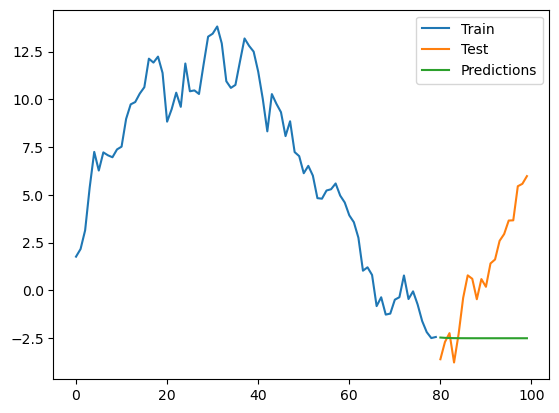

In [40]:
# 使用训练集、预测集再次检验超参数

# 创建训练集和测试集
train_size = int(len(df) * 0.8)  # 80% 的数据作为训练集
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 训练 ARIMA 模型
order = (p,d,q)
model = ARIMA(train['value'], order=order)
model_fit = model.fit()

# 在测试集上进行预测
predictions = model_fit.forecast(steps=len(test))

# 计算均方根误差
mse = mean_squared_error(test['value'], predictions)
print('Mean Squared Error:', mse)

# 可视化
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()



e:\anacondaa\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


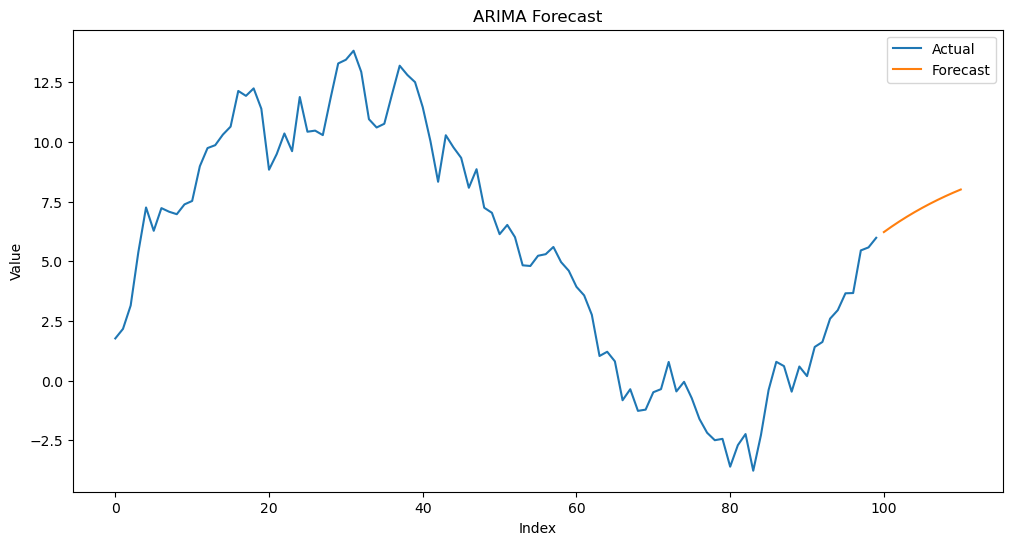

In [42]:
# 使用模型

# 拟合ARIMA模型
order = (p, d, q)
model = ARIMA(df['value'], order=order)
model_fit = model.fit()

# 预测未来的值
forecast = model_fit.predict(start=len(df), end=len(df) + 10, typ='levels')  # 这里预测未来10个时间点的值

# 可视化预测结果
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Actual')
plt.plot(range(len(df), len(df) + 11), forecast, label='Forecast')  # 这里假设你的索引是1、2、3...递增的整数
plt.title('ARIMA Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()